In [1]:
import os 
# Go one folder back
os.chdir('..')
from Python_scripts.data_processing import *
from Python_scripts.log_likelihood import *
from Python_scripts.utilities import *

import glob
import numpy as np
import pymc3 as pm
import theano.tensor as tt   
import ast
utility_class = utility_functions()


data=pd.read_csv('Data/all_combined.csv')
# import data in format
# Subject, chooce ,receivor, Wait2.RT, targettxt ,gender ,age ,As ,Ao
# subID,list, list ,list ,list, bool ,float ,float ,float


/home/mikkel/git/Bachelor_project/Python_scripts/data_processing.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose != '�ܾ�'] = 1
/home/mikkel/git/Bachelor_project/Python_scripts/data_processing.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose == '�ܾ�'] = 0


In [2]:
#import ut formels
from Python_scripts.log_likelihood import *
N_SAMPLES = 5000
formel=formels()


# Test MCMC on one person


In [4]:
person = 0

receivor=ast.literal_eval(data['receivor'][person])[0:40] if ast.literal_eval(data['receivor'][person])[0] >= 0 else ast.literal_eval(data['receivor'][person])[40:]
receivor=np.array(receivor)

choice=ast.literal_eval(data['choose'][person])[0:40] if ast.literal_eval(data['receivor'][person])[0] >= 0 else ast.literal_eval(data['choose'][person])[40:]
choice=np.array(choice)


choice = np.array([0 if np.isnan(x) else x for x in choice])
print(receivor)
print(f'subjet {data["Subject"][person]}')

[5. 2. 1. 3. 4. 2. 3. 1. 4. 5. 4. 1. 3. 5. 2. 1. 3. 5. 2. 4. 1. 3. 2. 5.
 4. 4. 1. 5. 3. 2. 5. 3. 1. 2. 4. 4. 1. 3. 5. 2.]
subjet 7


In [ ]:
# Define the MCMC model
with pm.Model() as model:
    
    # Define the priors
    alpha = pm.Gamma('alpha', alpha = 2, beta = 0.5)

    # Define the utelety
    u=formel.u(alpha,receivor)
    
    #p = pm.Deterministic('p', formel.g_propabelety(0.5,c,u))
    p = pm.Deterministic('p', tt.exp(u) / (1 + tt.exp(u)))

    # Define the likelihood
    observed = pm.Bernoulli('obs', p, observed = choice)

    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()

    # Sample from the posterior using the sampling method
    trace = pm.sample(N_SAMPLES, step=step);

# Print the summary of the posterior distribution
pm.summary(trace)

# Loop over all persons


In [ ]:
print(len(data))


for i in range(len(data)):
    person = i

    receivor=ast.literal_eval(data['receivor'][person])[0:40] if ast.literal_eval(data['receivor'][person])[0] >= 0 else ast.literal_eval(data['receivor'][person])[40:]
    receivor=np.array(receivor)

    choice=ast.literal_eval(data['choose'][person])[0:40] if ast.literal_eval(data['receivor'][person])[0] >= 0 else ast.literal_eval(data['choose'][person])[40:]
    choice=np.array(choice)
    # np.isnan() can now be applied on "choice"
    choice = np.array([0 if np.isnan(x) else x for x in choice])

    print(f'subjet {data["Subject"][person]}')
    N_SAMPLES = 5000

    # Define the MCMC model
    with pm.Model() as model:
        alpha = pm.Gamma('alpha', alpha = 2, beta = 0.5)

        # Define the likelihood
        u=receivor - alpha * ((10 - receivor) - receivor)


        p = pm.Deterministic('p', tt.exp(u) / (1 + tt.exp(u)))

        observed = pm.Bernoulli('obs', p, observed = choice)

        # Using Metropolis Hastings Sampling
        step = pm.Metropolis()

        # Sample from the posterior using the sampling method
        trace = pm.sample(N_SAMPLES, step=step);
    
    alpha_samples = trace[alpha, 1000:]
    np.savez(f'MCMC_tests/samples_{i}.npz', alpha=alpha_samples)
    print(f'person {i} is done')

# Simulation data


In [7]:
rep=40
lamb=2
np.random.seed(42)
sim_u = utility_class.Fehr_Schmidt

receivor=[None]*rep*5
print(len(receivor))
prop=[None]*rep*5
choice=[None]*rep*5
for i in range(rep):
    for resiv in range(1,6):
        utility_class.set_responder(resiv)
        receivor[(i*5)+resiv-1]=resiv

        # define the u func
        u=sim_u(lamb)

        # calculate the p
        p_sim=utility_class.P(u)
        prop[(i*5)+resiv-1]=p_sim
        # simulate from binomial distrabusing 
        choice[(i*5)+resiv-1]=np.random.binomial(n=1, p=p_sim)

receivor=np.array(receivor)      
choice = np.array([0 if np.isnan(x) else x for x in choice])



200


In [8]:
# Define the MCMC model
with pm.Model() as model:
    
    # Define the priors
    alpha = pm.Gamma('alpha', alpha = 1, beta = 0.25)

    # Define the utelety
    u=receivor - alpha * ((10 - receivor) - receivor)
    
    #p = pm.Deterministic('p', formel.g_propabelety(0.5,c,u))
    p = pm.Deterministic('p', tt.exp(u) / (1 + tt.exp(u)))

    # Define the likelihood
    observed = pm.Bernoulli('obs', p, observed = choice)

    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()

    # Sample from the posterior using the sampling method
    trace1 = pm.sample(5000, step=step);

# Print the summary of the posterior distribution
#pm.summary(trace)

/home/mikkel/miniconda3/envs/Batcheler/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 4 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [9]:
rep=40
lamb=0.5

sim_u = utility_class.Fehr_Schmidt

receivor=[None]*rep*5
print(len(receivor))
prop=[None]*rep*5
choice=[None]*rep*5
for i in range(rep):
    for resiv in range(1,6):
        utility_class.set_responder(resiv)
        receivor[(i*5)+resiv-1]=resiv

        # define the u func
        u=sim_u(lamb)

        # calculate the p
        p_sim=utility_class.P(u)
        prop[(i*5)+resiv-1]=p_sim
        # simulate from binomial distrabusing 
        choice[(i*5)+resiv-1]=np.random.binomial(n=1, p=p_sim)

receivor=np.array(receivor)      
choice = np.array([0 if np.isnan(x) else x for x in choice])




200


In [10]:

# Define the MCMC model
with pm.Model() as model:
    
    # Define the priors
    alpha = pm.Gamma('alpha', alpha = 1, beta = 0.25)

    # Define the utelety
    u=receivor - alpha * ((10 - receivor) - receivor)
    
    p = pm.Deterministic('p', tt.exp(u) / (1 + tt.exp(u)))

    # Define the likelihood
    observed = pm.Bernoulli('obs', p, observed = choice)

    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()

    # Sample from the posterior using the sampling method
    trace2 = pm.sample(5000, step=step);

# Print the summary of the posterior distribution
#pm.summary(trace)

/home/mikkel/miniconda3/envs/Batcheler/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [alpha]


/home/mikkel/miniconda3/envs/Batcheler/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


/home/mikkel/miniconda3/envs/Batcheler/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 3 seconds.
The number of effective samples is smaller than 25% for some parameters.


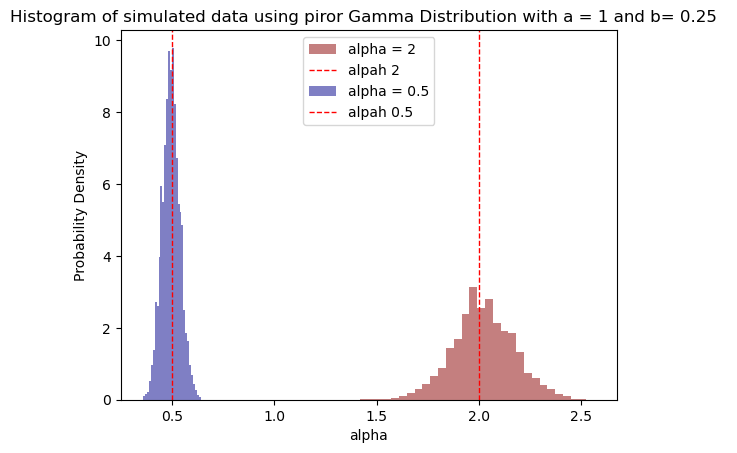

In [11]:

def plot_distrabustion(data1,data2):
    plt.title("Histogram of simulated data using piror Gamma Distribution with a = 1 and b= 0.25  ")

    plt.hist(data1, histtype='stepfilled', 
            color = 'darkred', bins=30, alpha=0.5, density=True,label='alpha = 2')
    
    plt.axvline(2, color='red', linestyle='dashed', linewidth=1, label='alpah 2')

    plt.hist(data2, histtype='stepfilled', 
            color = 'darkblue', bins=30, alpha=0.5, density=True,label='alpha = 0.5')
    
    plt.axvline(0.5, color='red', linestyle='dashed', linewidth=1, label='alpah 0.5')
    plt.ylabel('Probability Density')

    plt.xlabel('alpha')
    plt.legend()
    plt.show()

plot_distrabustion(trace1[alpha, 1000:],trace2[alpha, 1000:])